In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
# show all columns in the dataframe

pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('amazonfinds_35_tiktoks_working.csv')
df.head()

,filename,duration,transcription,id,username,wpm,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId
0,tiktoks/6899609374478601474_mik.zenon_16064404...,23,"Amazon products you need or don't, this could...",6899609374478601474,mik.zenon,208.695652,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 3507, 'followerCount': 3500000, ...",1606440495,PT. 131 of 365. Link in BIO. No more blindspot...,False,"{'collectCount': 542600, 'commentCount': 11700...","{'collectCount': '542569', 'commentCount': '11...",542600.0,11700.0,3507.0,20700000.0,194900.0,3500000.0,0.0,159900000.0,159900000.0,1197.0,mik.zenon,Mik Zenon,6795608523021632517
1,tiktoks/7259505958118853931_justicebuys_169023...,65,Top 15 Amazon products for this month. This i...,7259505958118853931,justicebuys,287.076923,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 1289, 'followerCount': 1200000, ...",1690235458,Number 3 is my fav 🙌🏼😂 #amazonfinds #gadgets #...,False,"{'collectCount': 1300000, 'commentCount': 1870...","{'collectCount': '1322694', 'commentCount': '1...",1300000.0,18700.0,1289.0,71600000.0,493200.0,1200000.0,0.0,35300000.0,35300000.0,155.0,justicebuys,Justice Buys,7155954783169496106
2,tiktoks/6975940059858046214_lopwert_1624212617...,59,I bought the world's smallest phone so you do...,6975940059858046214,lopwert,114.915254,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 4133, 'followerCount': 1100000, ...",1624212617,The smallest phone in the world! Thanks @amazo...,False,"{'collectCount': 124800, 'commentCount': 31900...","{'collectCount': '124787', 'commentCount': '31...",124800.0,31900.0,4133.0,24300000.0,59700.0,1100000.0,0.0,33500000.0,33500000.0,2994.0,lopwert,Luke,6778118587317404678
3,tiktoks/6961907699927747845_stuffyouactuallyne...,16,My side of the bed. Add a little bit of spice...,6961907699927747845,stuffyouactuallyneed,63.750000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 49000, 'followerCount': 1400000,...",1620945455,link in my bio if you want one for Father’s Da...,False,"{'collectCount': 108900, 'commentCount': 4714,...","{'collectCount': '108890', 'commentCount': '47...",108900.0,4714.0,49000.0,26700000.0,25900.0,1400000.0,0.0,65400000.0,65400000.0,1129.0,stuffyouactuallyneed,Jared Andersen,6837674956211454982
4,tiktoks/7147698077808282923_makeupbypita_16642...,40,I've waited a hundred years And I'd wait a mi...,7147698077808282923,makeupbypita,48.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 46900, 'followerCount': 781700, ...",1664203169,Made bath time a little special for the boys 🫧...,False,"{'collectCount': 367800, 'commentCount': 25300...","{'collectCount': '367787', 'commentCount': '25...",367800.0,25300.0,46900.0,37000000.0,118300.0,781700.0,0.0,22700000.0,22700000.0,620.0,makeupbypita,Makeupbypita,6613189250459467782


In [8]:
%%R -i df

df <- df

`geom_smooth()` using formula = 'y ~ x'

Call:
lm(formula = playCount ~ wpm, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-32041590 -19396227  -8079592   2862454 110669159 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43638260    8319059   5.246 8.94e-06 ***
wpm            30028      60918   0.493    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31550000 on 33 degrees of freedom
Multiple R-squared:  0.007309,	Adjusted R-squared:  -0.02277 
F-statistic: 0.243 on 1 and 33 DF,  p-value: 0.6253



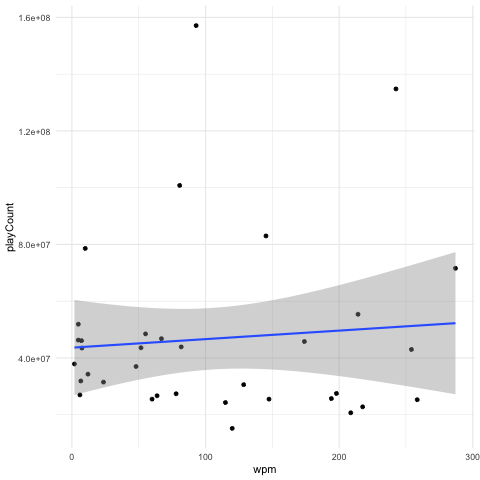

In [11]:
%%R

plt <- ggplot(df, aes(x=wpm, y=playCount)) + geom_point() + geom_smooth(method = 'lm') + theme_minimal()
print(plt)

model <- lm(playCount ~ wpm, data=df)
summary(model)

In [14]:
%%R

model <- lm(playCount ~ wpm + commentCount + shareCount + followerCount, data=df)
summary(model)


Call:
lm(formula = playCount ~ wpm + commentCount + shareCount + followerCount, 
    data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-33793518 -15055128  -4458371   7861169 110644828 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    2.737e+07  1.071e+07   2.557   0.0159 *
wpm           -9.773e+03  5.961e+04  -0.164   0.8709  
commentCount   4.598e+02  2.601e+02   1.768   0.0873 .
shareCount     2.157e+01  2.206e+01   0.978   0.3359  
followerCount  2.762e-01  1.831e+00   0.151   0.8811  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29630000 on 30 degrees of freedom
Multiple R-squared:  0.2038,	Adjusted R-squared:  0.09759 
F-statistic: 1.919 on 4 and 30 DF,  p-value: 0.133



In [19]:
i = 0
for cell in df['transcription']:
    # print(len(cell.split()))
    df.loc[i, 'numWords'] = len(cell.split())
    i += 1

df.head()

,filename,duration,transcription,id,username,wpm,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId,numWords
0,tiktoks/6899609374478601474_mik.zenon_16064404...,23,"Amazon products you need or don't, this could...",6899609374478601474,mik.zenon,208.695652,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 3507, 'followerCount': 3500000, ...",1606440495,PT. 131 of 365. Link in BIO. No more blindspot...,False,"{'collectCount': 542600, 'commentCount': 11700...","{'collectCount': '542569', 'commentCount': '11...",542600.0,11700.0,3507.0,20700000.0,194900.0,3500000.0,0.0,159900000.0,159900000.0,1197.0,mik.zenon,Mik Zenon,6795608523021632517,80.0
1,tiktoks/7259505958118853931_justicebuys_169023...,65,Top 15 Amazon products for this month. This i...,7259505958118853931,justicebuys,287.076923,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 1289, 'followerCount': 1200000, ...",1690235458,Number 3 is my fav 🙌🏼😂 #amazonfinds #gadgets #...,False,"{'collectCount': 1300000, 'commentCount': 1870...","{'collectCount': '1322694', 'commentCount': '1...",1300000.0,18700.0,1289.0,71600000.0,493200.0,1200000.0,0.0,35300000.0,35300000.0,155.0,justicebuys,Justice Buys,7155954783169496106,311.0
2,tiktoks/6975940059858046214_lopwert_1624212617...,59,I bought the world's smallest phone so you do...,6975940059858046214,lopwert,114.915254,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 4133, 'followerCount': 1100000, ...",1624212617,The smallest phone in the world! Thanks @amazo...,False,"{'collectCount': 124800, 'commentCount': 31900...","{'collectCount': '124787', 'commentCount': '31...",124800.0,31900.0,4133.0,24300000.0,59700.0,1100000.0,0.0,33500000.0,33500000.0,2994.0,lopwert,Luke,6778118587317404678,113.0
3,tiktoks/6961907699927747845_stuffyouactuallyne...,16,My side of the bed. Add a little bit of spice...,6961907699927747845,stuffyouactuallyneed,63.750000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 49000, 'followerCount': 1400000,...",1620945455,link in my bio if you want one for Father’s Da...,False,"{'collectCount': 108900, 'commentCount': 4714,...","{'collectCount': '108890', 'commentCount': '47...",108900.0,4714.0,49000.0,26700000.0,25900.0,1400000.0,0.0,65400000.0,65400000.0,1129.0,stuffyouactuallyneed,Jared Andersen,6837674956211454982,17.0
4,tiktoks/7147698077808282923_makeupbypita_16642...,40,I've waited a hundred years And I'd wait a mi...,7147698077808282923,makeupbypita,48.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 46900, 'followerCount': 781700, ...",1664203169,Made bath time a little special for the boys 🫧...,False,"{'collectCount': 367800, 'commentCount': 25300...","{'collectCount': '367787', 'commentCount': '25...",367800.0,25300.0,46900.0,37000000.0,118300.0,781700.0,0.0,22700000.0,22700000.0,620.0,makeupbypita,Makeupbypita,6613189250459467782,32.0


In [28]:
for index, row in df.iterrows():
    df.loc[index, 'wp30'] = row['numWords'] / row['duration'] * 30

df.head()

,filename,duration,transcription,id,username,wpm,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId,numWords,wp30
0,tiktoks/6899609374478601474_mik.zenon_16064404...,23,"Amazon products you need or don't, this could...",6899609374478601474,mik.zenon,208.695652,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 3507, 'followerCount': 3500000, ...",1606440495,PT. 131 of 365. Link in BIO. No more blindspot...,False,"{'collectCount': 542600, 'commentCount': 11700...","{'collectCount': '542569', 'commentCount': '11...",542600.0,11700.0,3507.0,20700000.0,194900.0,3500000.0,0.0,159900000.0,159900000.0,1197.0,mik.zenon,Mik Zenon,6795608523021632517,80.0,104.347826
1,tiktoks/7259505958118853931_justicebuys_169023...,65,Top 15 Amazon products for this month. This i...,7259505958118853931,justicebuys,287.076923,{'avatarLarger': 'https://p16-sign.tiktokcdn-u...,"{'diggCount': 1289, 'followerCount': 1200000, ...",1690235458,Number 3 is my fav 🙌🏼😂 #amazonfinds #gadgets #...,False,"{'collectCount': 1300000, 'commentCount': 1870...","{'collectCount': '1322694', 'commentCount': '1...",1300000.0,18700.0,1289.0,71600000.0,493200.0,1200000.0,0.0,35300000.0,35300000.0,155.0,justicebuys,Justice Buys,7155954783169496106,311.0,143.538462
2,tiktoks/6975940059858046214_lopwert_1624212617...,59,I bought the world's smallest phone so you do...,6975940059858046214,lopwert,114.915254,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 4133, 'followerCount': 1100000, ...",1624212617,The smallest phone in the world! Thanks @amazo...,False,"{'collectCount': 124800, 'commentCount': 31900...","{'collectCount': '124787', 'commentCount': '31...",124800.0,31900.0,4133.0,24300000.0,59700.0,1100000.0,0.0,33500000.0,33500000.0,2994.0,lopwert,Luke,6778118587317404678,113.0,57.457627
3,tiktoks/6961907699927747845_stuffyouactuallyne...,16,My side of the bed. Add a little bit of spice...,6961907699927747845,stuffyouactuallyneed,63.750000,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 49000, 'followerCount': 1400000,...",1620945455,link in my bio if you want one for Father’s Da...,False,"{'collectCount': 108900, 'commentCount': 4714,...","{'collectCount': '108890', 'commentCount': '47...",108900.0,4714.0,49000.0,26700000.0,25900.0,1400000.0,0.0,65400000.0,65400000.0,1129.0,stuffyouactuallyneed,Jared Andersen,6837674956211454982,17.0,31.875000
4,tiktoks/7147698077808282923_makeupbypita_16642...,40,I've waited a hundred years And I'd wait a mi...,7147698077808282923,makeupbypita,48.000000,{'avatarLarger': 'https://p16-pu-sign-useast8....,"{'diggCount': 46900, 'followerCount': 781700, ...",1664203169,Made bath time a little special for the boys 🫧...,False,"{'collectCount': 367800, 'commentCount': 25300...","{'collectCount': '367787', 'commentCount': '25...",367800.0,25300.0,46900.0,37000000.0,118300.0,781700.0,0.0,22700000.0,22700000.0,620.0,makeupbypita,Makeupbypita,6613189250459467782,32.0,24.000000


In [35]:
df[df['isAd'] == True]

,filename,duration,transcription,id,username,wpm,author,authorStats,createTime,desc,isAd,stats,statsV2,collectCount,commentCount,diggCount,playCount,shareCount,followerCount,friendCount,heart,heartCount,videoCount,uniqueId,nickname,authorId,numWords,wp30
11,tiktoks/7058546692563455234__tusya_kiskis_1643...,18,Thanks for watching.,7058546692563455234,NaN,10.0,{'avatarLarger': 'https://p16-sign-sg.tiktokcd...,"{'diggCount': 919, 'followerCount': 8600000, '...",1643445970,Навели красоту 😻 #amazonfinds #amazonmusthaves,True,"{'collectCount': 251200, 'commentCount': 57800...","{'collectCount': '251243', 'commentCount': '57...",251200.0,57800.0,919.0,78600000.0,235600.0,8600000.0,0.0,144700000.0,144700000.0,204.0,_tusya_kiskis,_Tusya_kiskis,6971481012379386885,3.0,5.0


In [30]:
%%R -i df

df <- df

In [33]:
%%R

model <- lm(playCount ~ wp30 + commentCount + shareCount + followerCount + duration, data=df)
summary(model)


Call:
lm(formula = playCount ~ wp30 + commentCount + shareCount + followerCount + 
    duration, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-36927505 -14325436  -4456918   7733065 108706441 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    1.618e+07  1.249e+07   1.296   0.2052  
wp30          -3.352e+04  1.164e+05  -0.288   0.7754  
commentCount   4.710e+02  2.534e+02   1.859   0.0732 .
shareCount     1.605e+01  2.174e+01   0.738   0.4663  
followerCount -1.005e-01  1.798e+00  -0.056   0.9558  
duration       3.809e+05  2.341e+05   1.627   0.1146  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28850000 on 29 degrees of freedom
Multiple R-squared:  0.2704,	Adjusted R-squared:  0.1446 
F-statistic: 2.149 on 5 and 29 DF,  p-value: 0.08765



In [36]:
%%R

model <- lm(commentCount ~ wp30 + playCount + shareCount + followerCount + duration, data=df)
summary(model)


Call:
lm(formula = commentCount ~ wp30 + playCount + shareCount + followerCount + 
    duration, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-23299 -13349  -3450   5877  53004 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)  
(Intercept)    8.651e+03  8.753e+03   0.988   0.3311  
wp30           3.316e+01  8.052e+01   0.412   0.6835  
playCount      2.261e-04  1.216e-04   1.859   0.0732 .
shareCount     3.255e-02  1.395e-02   2.333   0.0268 *
followerCount  1.119e-03  1.228e-03   0.911   0.3697  
duration      -1.087e+02  1.682e+02  -0.646   0.5234  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19990 on 29 degrees of freedom
Multiple R-squared:  0.3307,	Adjusted R-squared:  0.2153 
F-statistic: 2.866 on 5 and 29 DF,  p-value: 0.03196

